# Project: Investigate Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### <font color='red'>UPDATED</font>
- Add titles and labels to each plot
- Use pandas explode(), after having splitted by "|" as the separator, followed by a pandas groupby() for direct plotting instead of split and created separate columns
- Use pandas assign() to create new columns
- Use query to filter a dataframe with multiple conditions
- Use pivot_table to create a spreadsheet-style pivot table with aggregation instead of melt and groupby
<!-- stack and unstack -->

<a id='intro'></a>
## Introduction
I chose TMDB movie data to investigate in this project. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

There are some notes that need to pay attention when working with the dataset:
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column (can leave them as is).
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

I come up with big question "What kind of movie that people are interested in and if movie industry serves that need?". To answer this, I seperate big question to smaller ones:
- Which genres are most common/popular from year to year? 
<!-- - What kinds of properties are associated with movies that have high revenues? -->
- Which genres grow the most?
- What are typical movies that have high revenues/profit/votes?


<a id='wrangling'></a>
## 1. Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### 1.1. General Properties

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load in the data

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Check for cleanliness (finding colunm/row count, datatype, duplicate records and missing values)

- This dataset has 10866 entries and 21 columns. 
- There are 9 columns having null records including imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies. 
- release_date columns is in object type.
- 1 dupicate record

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
print( "Number of Duplicate values: " + str(df.duplicated().sum()))

Number of Duplicate values: 1


I trim dataset by drop some unused columns.

In [5]:
df_trim = df[['id','original_title','cast', 'director','runtime','genres','release_date','release_year','popularity','vote_count','vote_average','budget_adj','revenue_adj']]
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   original_title  10866 non-null  object 
 2   cast            10790 non-null  object 
 3   director        10822 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   release_year    10866 non-null  int64  
 8   popularity      10866 non-null  float64
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


### 1.2. Data Cleaning

#### Change datatype of release_date column

In [6]:
df_changetype = df_trim.astype({'release_date': 'datetime64[ns]'})

#### Removing duplicated row

In [7]:
df_dropdup = df_changetype.drop_duplicates()

There are 10865 entries after being removed 1 duplicated row.

In [8]:
print( "Dataset shape: " + str(df_dropdup.shape))
print( "Number of Duplicate values: " + str(df_dropdup.duplicated().sum()))

Dataset shape: (10865, 13)
Number of Duplicate values: 0


#### Deal with missing values
Among 9 columns having null records, only genres column is useful for questions I list above. Genres column has 23 null records which is unremarkable compared to 10842 non-null values. Therefore I ignore these null records.

#### Format dataset

I create new column named "profit" for analysis

In [21]:
df_dropdup = df_dropdup.assign(profit = df_dropdup['revenue_adj'] - df_dropdup['budget_adj'])

I seperate genres, cast and director columns into subcolumns.

In [22]:
df_final = df_dropdup.assign(genres=df_dropdup['genres'].str.split('|')\
                     , cast=df_dropdup['cast'].str.split('|')\
                     , director=df_dropdup['director'].str.split('|')\
                 ).explode('genres').explode('cast').explode('director')
# df_final.describe()
# df_final.head()

<a id='eda'></a>
## 2. Exploratory Data Analysis

### 2.1. Which genres are most common/popular from year to year? 

There is no viewer attribute in the dataset and the popular column may be ambigous about how it is count therefore I use the vote_count to find the number of people watch and interact with the movies.

In [23]:
genre_common = pd.pivot_table(df_final[['id','genres']].drop_duplicates(), values = 'id', index = 'genres', aggfunc = 'count')
genre_popular = pd.pivot_table(df_final[['id','genres','vote_count']].drop_duplicates(), values = 'vote_count', index = 'genres', aggfunc = 'mean')
genre_revenue = pd.pivot_table(df_final[['id','genres','revenue_adj']].drop_duplicates(), values = 'revenue_adj', index = 'genres', aggfunc = 'mean')
genre_budget = pd.pivot_table(df_final[['id','genres','budget_adj']].drop_duplicates(), values = 'budget_adj', index = 'genres', aggfunc = 'mean')
genre_profit = pd.pivot_table(df_final[['id','genres','profit']].drop_duplicates(), values = 'profit', index = 'genres', aggfunc = 'mean')
genre_vote = pd.pivot_table(df_final[['id','genres','vote_average']].drop_duplicates(), values = 'vote_average', index = 'genres', aggfunc = 'mean')

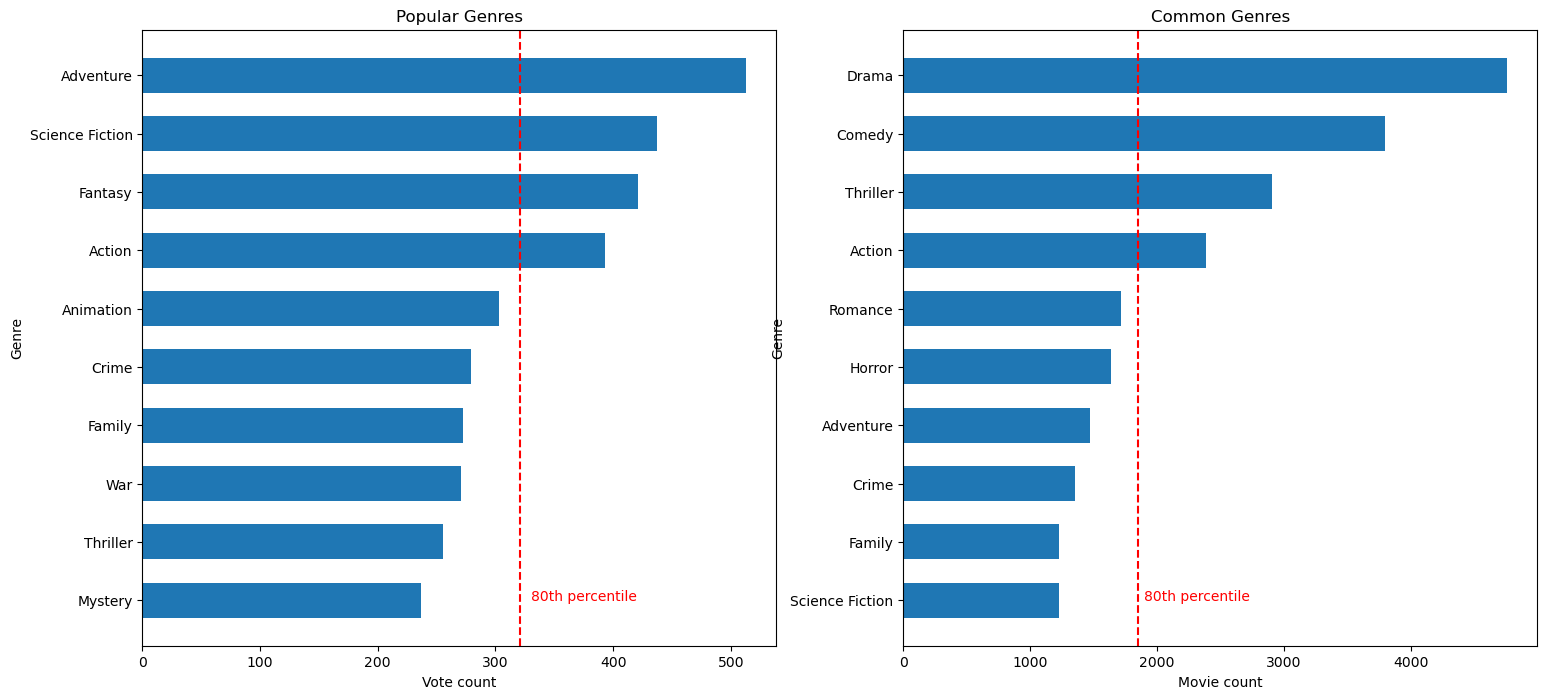

In [33]:
genre_chart_pop = genre_popular.sort_values(by = ['vote_count']).tail(10).reset_index()
genre_chart_com = genre_common.sort_values(by = ['id']).tail(10).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.barh(genre_chart_pop['genres'], genre_chart_pop['vote_count'], 0.6)
ax1.axvline(np.percentile(genre_popular['vote_count'],80),color = 'r',ls='--')
ax1.text(330,0,'80th percentile',color = 'r')
ax1.set_title('Popular Genres')
ax1.set_xlabel('Vote count')
ax1.set_ylabel('Genre')

ax2.barh(genre_chart_com['genres'], genre_chart_com['id'], 0.6)
ax2.axvline(np.percentile(genre_common['id'],80),color = 'r',ls='--')
ax2.text(1900,0,'80th percentile',color = 'r')
ax2.set_title('Common Genres')
ax2.set_xlabel('Movie count')
ax2.set_ylabel('Genre')

plt.show()

Drama, Comedy, Thriller and Action are 4 most common genres while Adverture, Science Fiction, Fantasy and Action are 4 most popular ones. This shows oppotunities for Adverture, Science Fiction and Fantasy to grow.

### 2.2. Which genres grow the most?

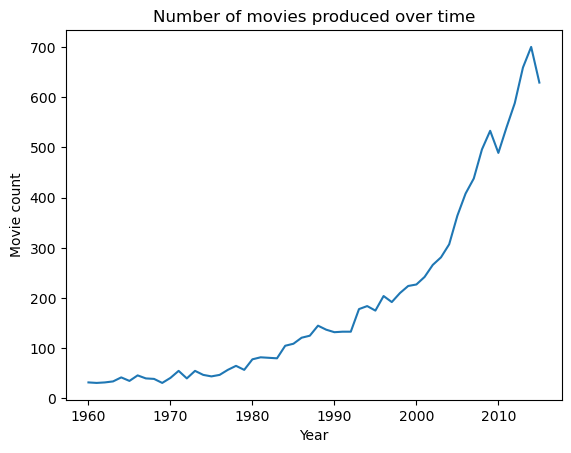

In [36]:
df_final.groupby(['release_year'])['id'].nunique().plot()
plt.title("Number of movies produced over time")
plt.xlabel("Year")
plt.ylabel("Movie count")
plt.show()

The line graph above shows amount of movies in 55-year-period from 1960 to 2015. Overall, movie industry surged significantly over time. The amount of movies in 2014 tripled this amount in 2000. Let's detail down to see changes between different genres.

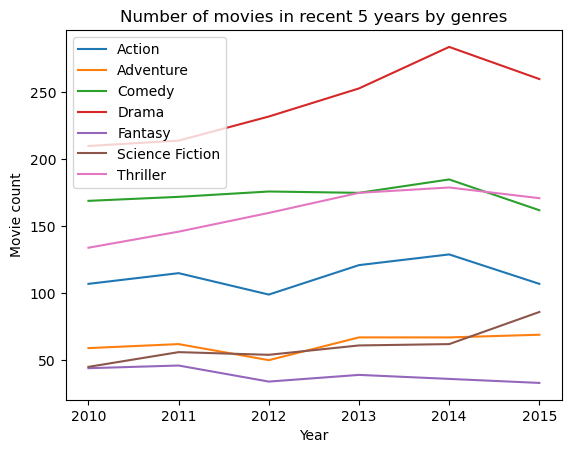

In [58]:
top_genre = ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Science Fiction', 'Thriller']
year_chart = df_final.query('release_year > 2009 & genres == @top_genre').groupby(['release_year','genres'])['id'].nunique().reset_index()

for i in top_genre:
    plt.plot(year_chart.query('genres == @i')['release_year'], year_chart.query('genres == @i')['id'], label = i)

plt.title("Number of movies in recent 5 years by genres")
plt.xlabel("Year")
plt.ylabel("Movie count")
plt.legend()
plt.show()

I create line chart showing the growth of 7 most popular/common genres including Action, Adventure, Comedy, Drama, Fantacy, Science Fiction and Thriller in 5 latest years. Drama, Thriller and Science Fiction witness a clearly upward trend with the increase by around 50 movies each genre. Adventure raised slightly while Action stayed nearly unchanged. Oppositely, Comedy and Fantasy went a litle down.
Combining this and insight about common/popular genres above, Adventure and Fantasy would be better choice if I want to produce a new film when Science Fiction would be a little competitive and other genres may not serve viewers need. 

### 2.3. What are typical movies that have high revenues/profit/votes?

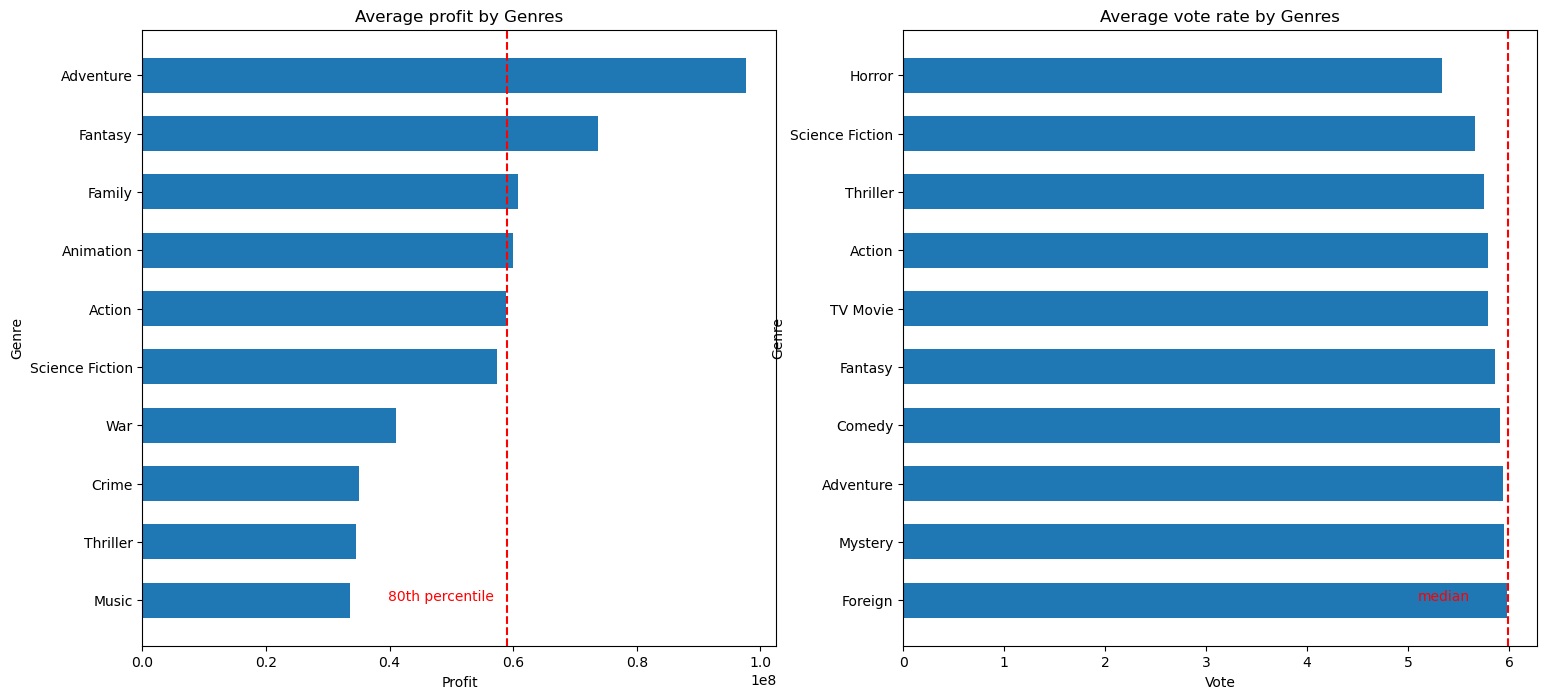

In [59]:
genre_chart_pro = genre_profit.sort_values(by = ['profit']).tail(10).reset_index()
genre_chart_vot = genre_vote.sort_values(by = ['vote_average'], ascending = False).tail(10).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.barh(genre_chart_pro['genres'], genre_chart_pro['profit'], 0.6, label = 'Profit')
ax1.axvline(np.percentile(genre_profit['profit'],80),color = 'r',ls='--')
ax2.text(-5.1,0,'80th percentile',color = 'r')
ax1.set_title('Average profit by Genres')
ax1.set_xlabel('Profit')
ax1.set_ylabel('Genre')

ax2.barh(genre_chart_vot['genres'], genre_chart_vot['vote_average'], 0.6)
ax2.axvline(np.percentile(genre_vote['vote_average'],50),color = 'r',ls='--',label = '50th percentile')
ax2.text(5.1,0,'median',color = 'r')
ax2.set_title('Average vote rate by Genres')
ax2.set_xlabel('Vote')
ax2.set_ylabel('Genre')
          
plt.show()

Among all genres, Adventure and Fantasy brought highest revenues and also profits. The average votes of these genres were below median which means these genres had not had highly rated movies yet.

However, one of the obstacle making these is its high budgets, average more than 37 millions.

In [60]:
genre_budget_chart = genre_budget.sort_values(by = ['budget_adj'], ascending = False)
genre_budget_chart.head()

,budget_adj
genres,
Adventure,4.393734e+07
Fantasy,3.742932e+07
Action,3.296011e+07
Science Fiction,2.952429e+07
War,2.893007e+07


Producing Adventure and Fantasy movies, producer can consider are some diractors and casts lists who had most votes and ratings.

In [69]:
dir_list = pd.pivot_table(df_final[['id','genres','director','vote_count','vote_average']]\
                   .drop_duplicates()\
                   .query('genres == ["Adventure","Fantasy"]')\
               , values = ['vote_count','vote_average'], index = 'director', aggfunc = 'mean')

Top 10 diractors whose films had most views.

In [70]:
dir_list.sort_values(by='vote_count', ascending = False).head(10)

,vote_average,vote_count
director,,
Shane Black,6.900000,6882.000000
James Cameron,7.033333,5787.333333
James Gunn,7.900000,5612.000000
Colin Trevorrow,6.500000,5562.000000
Christopher Nolan,7.466667,5437.333333
Gary Ross,6.733333,4801.000000
Sam Mendes,6.500000,4695.500000
Ang Lee,7.100000,4338.000000
Bob Peterson,7.600000,4225.000000


Top 10 diractors whose films had highest ratings.

In [71]:
dir_list.sort_values(by='vote_average', ascending = False).head(10)

,vote_average,vote_count
director,,
Curt Morgan,8.5,60.0
Anthony Mandler,8.4,24.0
Frank Darabont,8.0,2299.0
Nick Hurran,8.0,190.0
Peter Mortimer,7.9,12.0
Paul Wilmshurst,7.9,50.0
Don Hertzfeldt,7.9,51.0
Nick Rosen,7.9,12.0
James Gunn,7.9,5612.0


In [73]:
cast_list = pd.pivot_table(df_final[['id','genres','cast','vote_count','vote_average']]\
                   .drop_duplicates()\
                   .query('genres == ["Adventure","Fantasy"]')\
               , values = ['vote_count','vote_average'], index = 'cast', aggfunc = 'mean')

Top 10 casts whose films had most views.

In [21]:
cast_list.sort_values(by='vote_count', ascending = False).head(10)

value_x
Ellen Page            9767.0
Josh Helman           6185.0
Javier Bardem         6137.0
Dave Bautista         5612.0
Chris Pratt           5587.0
Nick Robinson         5562.0
Daisy Ridley          5292.0
Ken Watanabe          5029.5
Irrfan Khan           4950.0
Scarlett Johansson    4600.4
Name: vote_count, dtype: float64

Top 10 casts whose films had highest ratings.

In [74]:
cast_list.sort_values(by='vote_average', ascending = False).head(10)

,vote_average,vote_count
cast,,
Ellen Page,7.90,9767.0
Josh Helman,7.10,6185.0
Javier Bardem,6.80,6137.0
Dave Bautista,7.90,5612.0
Chris Pratt,7.20,5587.0
Nick Robinson,6.50,5562.0
Daisy Ridley,7.50,5292.0
Ken Watanabe,7.40,5029.5
Irrfan Khan,6.80,4950.0


Besides, there is no correlation between popularity, runtime, vote_average, release_year and revenue & profit.

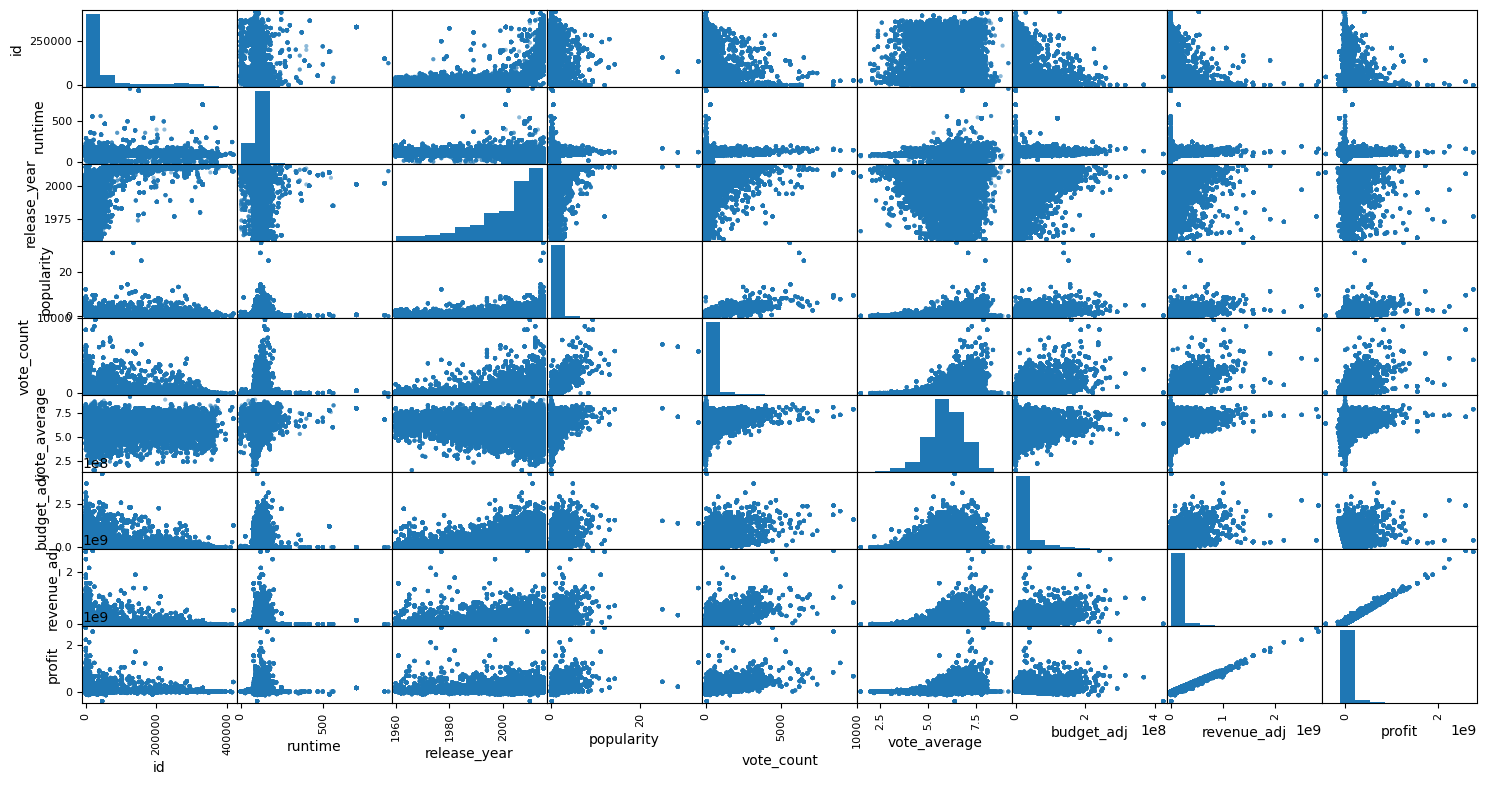

In [75]:
pd.plotting.scatter_matrix(df_final,figsize=(18,9))
plt.show()

<a id='conclusions'></a>
## Conclusions

This project answers the question of producers when start choosing which type of movies they should make. "What kind of movie that people are interested in and if movie industry serves that need?"

After exploring the dataset, Adventure and Fantasy are figured out to be 2 most potential genres which met both customer needs (high interested) and producer needs (high profits).

Howerver, these kinds of movies require huge budget to make. This topic can be continue analyzed in aspect of low-budget movies. 

This project may experience some limitation or incorrectness due to lack of views information.